# Machine Learning Project: Boston Housing Median House Value Prediction

## Problem Statement
The aim is to accurately predict the median housing values using machine learning algorithms.

## Evaluation Metrics
Evaluation metrics will be using r-squared for this regression task. Rather than using RMSE or MSE, r-squared is interpretable and common.

## Project Layout

The following steps represent the project layout (active hyperlinks that navigate the notebook). Though these are sequentially listed, it is an iterative process and more cyclical in nature as the problem is more understood. 

* [Step 1](#step1): Retrieve Data
* [Step 2](#step2): Exploratory Data Analysis: Clean & Explore
* [Step 3](#step3): Prepare & Transform
* [Step 4](#step4): Develop & Train Model(s)
    * [Model 1](#benchmark):  Benchmark model
    * [Model 2](#rfe):  Recursive Feature Elimination Model
    * [Model 3](#final_model):  Final ML Regression Model    
* [Step 5](#step5): Validate & Evaluate Results
* [Step 6](#step6): Deployment Discussion

---
<a id='step1'></a>
## Step 1: Retrieve Data
Importing Datasets & Packages


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="whitegrid")
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

#suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# parameters
rand = 12
split = 0.3

Obtaining the feature and target data from the boston dataset.

In [3]:
boston = load_boston()

#Loading our feature data
df = pd.DataFrame(boston.data, columns = boston.feature_names)

#Getting our target data
df['MEDV'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


All variables are initially Float64, there are 506 records, which is a pretty small dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


---
<a id='step2'></a>
## Step 2: Exploratory Data Analysis: Clean & Explore

<div>
<img src="images/dataset.jpg" width="1000"/>
</div>

In [6]:
#insepecting the data type
# above data came from the following code, saved as image to only key information; print(boston.DESCR)
print("Missing Data - there are this many occurances: {}".format(df.isna().sum().sum()))

Missing Data - there are this many occurances: 0


## Visualization of target and features

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Based on the following it looks like CHAS and RAD are categorical variables, with less than 10 unique values. We know from the data dictionary that CHAS is binary, and will need to be encoded this way.

In [8]:
# getting a list of the features for plotting
features = df.columns[:-1].tolist() #-1 removes the target var
for i in features:
    print("Feature {} has {} unique values.".format(i,df[i].nunique()))

Feature CRIM has 504 unique values.
Feature ZN has 26 unique values.
Feature INDUS has 76 unique values.
Feature CHAS has 2 unique values.
Feature NOX has 81 unique values.
Feature RM has 446 unique values.
Feature AGE has 356 unique values.
Feature DIS has 412 unique values.
Feature RAD has 9 unique values.
Feature TAX has 66 unique values.
Feature PTRATIO has 46 unique values.
Feature B has 357 unique values.
Feature LSTAT has 455 unique values.


### Target Variable Review

- Our target variable is continuous, and not far from a normal distribution. 
- The distribution ranges from 5 to 50, which is actually in 1,000 USD, and a median value. This seems low for housing in Boston, so may need to confirm this. A 5,000 USD home? Based on this link, seems accurate since data is circa 1980 (http://lib.stat.cmu.edu/datasets/boston).
- No missing data.
- Mean value at 22,500 USD.
- Overall dataset is small at 506 records.

In [9]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

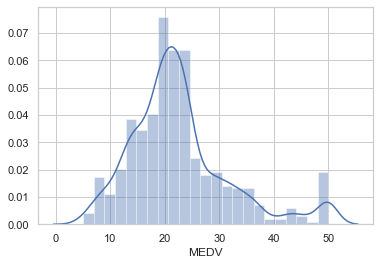

In [10]:
sns.distplot(df['MEDV'])

### Univariate Visualization

The univariate distributions show (and based on our describe statistics above), show that the scales are not too different, but will do the following
- Encode categorical features
- Transform skewed features such as CRIM, AGE, DIS, B, and ZN
- Scale the values (so larger values and outliers do not have undue influence in the model)

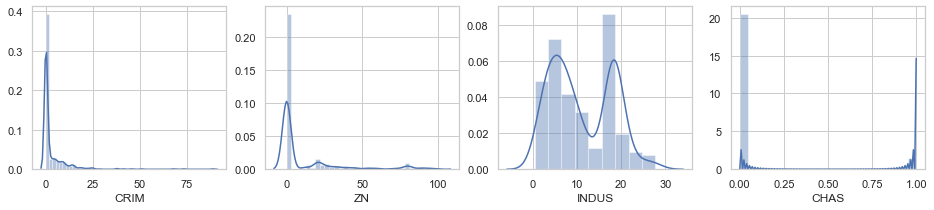

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['CRIM', 'ZN', 'INDUS', 'CHAS'], axes):
    sns.distplot(df[xcol], ax=ax)

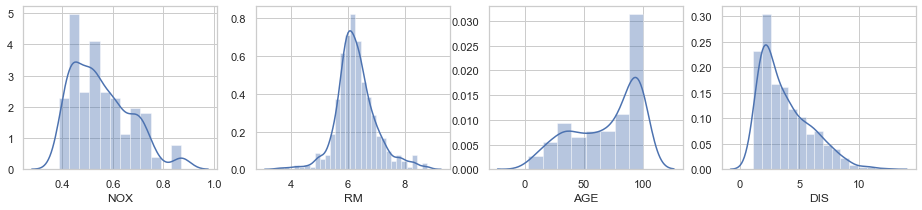

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(['NOX', 'RM', 'AGE', 'DIS'], axes):
    sns.distplot(df[xcol], ax=ax)

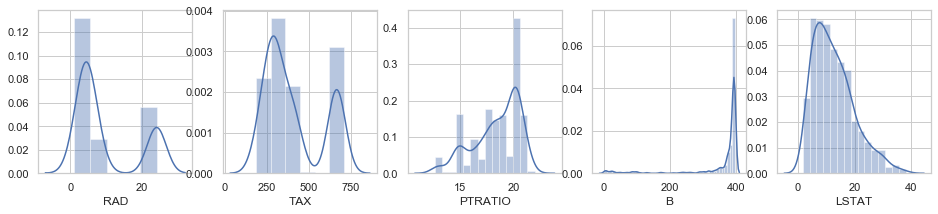

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['RAD','TAX','PTRATIO','B','LSTAT'], axes):
    sns.distplot(df[xcol], ax=ax)

### Bivariate Visualization With Target Variable MEDV

It clear that CHAS and RAD are categorical based on both the univariate and bivariate plots.

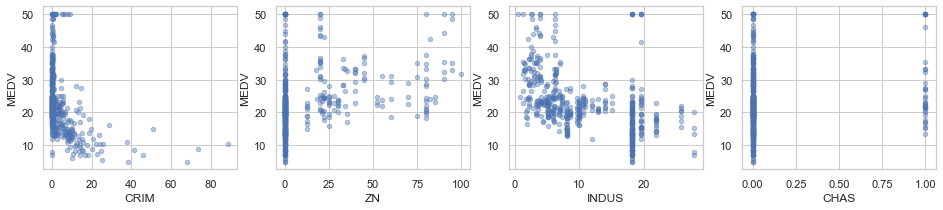

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['CRIM', 'ZN', 'INDUS', 'CHAS'], axes):
    df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.4, color='b')

In [15]:
for xcol, ax in zip(['NOX', 'RM', 'AGE', 'DIS'], axes):
    df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.4, color='b')

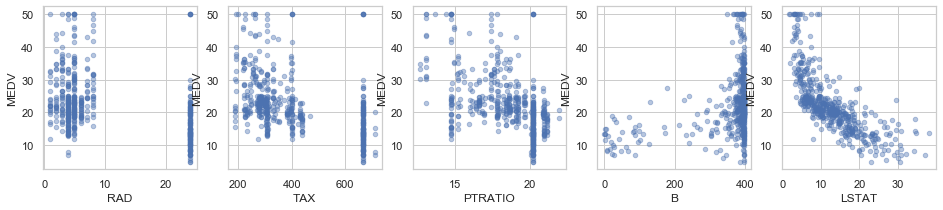

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['RAD','TAX','PTRATIO','B','LSTAT'], axes):
    df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.4, color='b')

Looking at correlations to avoid multicolinearity. If greater than 70% will be true. It appears that INDUS, NOX, AGE, and DIS have mild to high correlation, and will consider removing in preparation and transformation phase, while in model developement as well. Changes in these variables will likely be associated with changes in others as well, which can affect interpretation of p-values. (https://en.wikipedia.org/wiki/Multicollinearity)

In [17]:
abs(df.corr()) > 0.7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,True,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,True,False,False,False,False,False,False
DIS,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


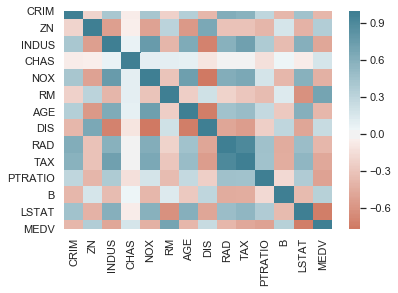

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), center=0, cmap=sns.diverging_palette(20, 220, n=200));

---
<a id='step3'></a>
## Step 3: Prepare & Transform

**Encoding categorical variables RAD and CHAS.**

In [19]:
# using pd.get_dummies and dropping one, to be our reference groups
RAD_dummies = pd.get_dummies(df['RAD'], prefix='RAD', drop_first=True)
CHAS_dummies = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=True)

# Dropping the original columns
df_categorical = df.drop(['RAD','CHAS'], axis=1)

# Concatenating our categorical df and CHAS and RAD dummies
df_categorical = pd.concat([df_categorical,CHAS_dummies,RAD_dummies], axis = 1)
df_categorical.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,MEDV,CHAS_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,24.0,0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,36.2,0,0,1,0,0,0,0,0,0


**Transforming skewed variables, scaling, and normalization.**

Transform skewed features such as CRIM, AGE, DIS, B, and ZN

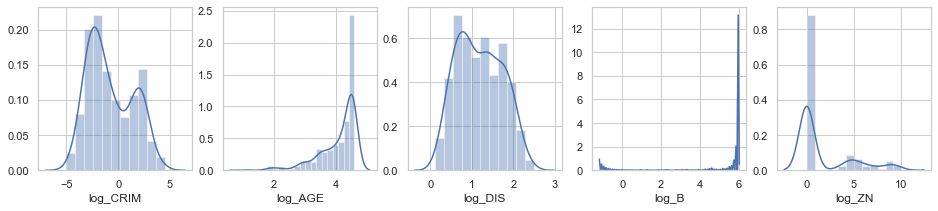

In [20]:
#Transforming non-normal (skewed data)
df_log = pd.DataFrame([])
df_log['log_CRIM'] = np.log(df['CRIM'])
df_log['log_AGE'] = np.log(df['AGE'])
df_log['log_DIS'] = np.log(df['DIS'])
df_log['log_B'] = np.log(df['B'])
df_log['log_ZN'] = np.sqrt(df['ZN']) # since 0 in dataset, leaving as "log" for consistancy

#plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['log_CRIM','log_AGE','log_DIS','log_B','log_ZN'], axes):
    sns.distplot(df_log[xcol], ax=ax)

Transforming CRIM, DIS helped, and somewhat for AGE, but not the best for our other variables. May need to return and make changes, but will move foreward with these.

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# this is a test deployment model - comment out later


In [24]:

y = df[['MEDV']]
X = df[['CRIM','NOX','RM']]

import statsmodels.api as sm
from statsmodels.formula.api import ols

test_deployment_model = sm.OLS(y, X).fit()
test_deployment_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              2352.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):                   1.77e-295
Time:                        19:09:17   Log-Likelihood:                         -1647.5
No. Observations:                 506   AIC:                                      3301.
Df Residuals:                     503   BIC:                                      3314.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1882      0.036     -5.218      0.000      -0.259      -0.117
NOX          -23.0276      2.139    -10.766      0.000     -27.230     -18.825
RM             5.7473      0.183     31.449      0.000       5.388       6.106
==============================================================================
Omnibus:                      218.800   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.582
Skew:                           1.874   Prob(JB):                    7.59e-239
Kurtosis:                       9.162   Cond. No.                         74.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import pickle
pickle.dump(test_deployment_model, open('model.pkl','wb'))

In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
model_remade = pickle.load(open('model.pkl','rb'))
print(model_remade.predict([[2,1,4]]))

[-0.41482866]


# end test deployment model

---
<a id='step4'></a>
## Step 4: Develop & Train Model(s)

---
<a id='benchmark'></a>
### Benchmark model

Using only the df_categorical, which does not have data transformations other than encoding categorical variables.

In [ ]:
df_categorical.columns

Below removing the features that were log transformed, and adding the log transformed features.

In [ ]:
df_categorical.drop(['CRIM', 'ZN','AGE','B','DIS'], axis = 1, inplace = True)

df_categorical = pd.concat([df_categorical,df_log],axis = 1)
df_categorical.head()

Reviewing correlation plot for variables with multicollinearity. TAX is a candidate for removal based on the matrix, and .7 cutoff. Others could be removed as well, but is 

In [ ]:
df_categorical.corr()

TAX appears highly correlated with multiple features, so removing to avoid multicollinearity. 

In [ ]:
y = df_categorical[['MEDV']]
X = df_categorical.drop(['MEDV','TAX'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= split, random_state=rand)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# scaling training features, avoiding data leakage by doing after the split
scale = StandardScaler()

#fitting the scaler on the training data
X_train_transformed = scale.fit_transform(X_train[['log_CRIM', 'log_ZN', 'INDUS', 'NOX', 'RM', 'log_AGE', 'log_DIS', 'PTRATIO', 'log_B','LSTAT']])
print(X_train_transformed.shape)

#applying the scaler also on the test data (not refitting)
X_test_transformed = scale.transform(X_test[['log_CRIM', 'log_ZN', 'INDUS', 'NOX', 'RM', 'log_AGE', 'log_DIS', 'PTRATIO', 'log_B','LSTAT']])
print(X_test_transformed.shape)


In [ ]:
#saving the standard_scaler object to use on new data, to artifacts directory
from sklearn.externals.joblib import dump, load
dump(scale, 'artifacts/std_scaler.bin', compress=True)

#to use later
# sc=load('artifacts/std_scaler.bin')

Here we are recombining the categorical variables and the scaled continuous variables

In [ ]:
#combining as dataframes, scaled continuous data
X_train_scaled = pd.DataFrame(X_train_transformed, columns=['log_CRIM', 'log_ZN', 'INDUS', 'NOX', 'RM', 'log_AGE', 'log_DIS', 'PTRATIO', 'log_B','LSTAT'])
X_test_scaled = pd.DataFrame(X_test_transformed, columns=['log_CRIM', 'log_ZN', 'INDUS', 'NOX', 'RM', 'log_AGE', 'log_DIS',  'PTRATIO', 'log_B','LSTAT'])
print(X_train_scaled.shape)
print(type(X_train_scaled))

# obtaining the categorical data
X_train_cat = X_train[['CHAS_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0','RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0']]
X_test_cat = X_test[['CHAS_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0','RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0']]
print(X_train_cat.shape)

# removing the indicies in order to concatenate
X_train_cat.reset_index(drop = True, inplace =True) #removing the index so that merging 
X_test_cat.reset_index(drop = True, inplace =True) #removing the index so that merging 
y_train.reset_index(drop = True, inplace =True)
y_test.reset_index(drop = True, inplace =True)

#combining the training data
X_train_combo = pd.concat([X_train_scaled, X_train_cat], axis = 1, ignore_index = False)
print(X_train_combo.shape)

X_test_combo = pd.concat([X_test_scaled, X_test_cat], axis = 1, ignore_index = False)
print(X_train_combo.shape)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

benchmark_model = sm.OLS(y_train, X_train_combo).fit()
benchmark_model.summary()


In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, benchmark_model.predict(X_test_combo))
coefficient_of_dermination

We can see that the model has a high r-squared, but problems exist. Some variables are not significant, with p-values greater than 0.05. 

Also, the output exhibits potential multicollinearity, which indicates our parameter estimates might swing wildly, or be unreliable. This was occuring before Standardizing the continous variables, and is no longer present.

Our r-squared for the test data is 54.5% compared to our training data of 94.6%. This is a large difference, and an indication our model is not generalizing well to new data.

In [ ]:
X_train_combo.columns

In [ ]:
X_train_combo.drop(['INDUS','log_AGE','CHAS_1.0','log_ZN'],axis =1,inplace = True)
X_test_combo.drop(['INDUS','log_AGE','CHAS_1.0','log_ZN'],axis =1,inplace = True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

improved_model = sm.OLS(y_train, X_train_combo).fit()
improved_model.summary()


<div>
<img src="images/dataset.jpg" width="1000"/>
</div>

In [ ]:
X_test_combo.head()

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, improved_model.predict(X_test_combo))
coefficient_of_dermination

In the refined model, we do not see signs of multicollinearity, and all our variables are significant at 0.05 level. Our training r-squared is still around 94% while the test accuracy is only 57%. It is important to investigate this difference, and will make suggestions for improvement.

Reviewing the coefficients, the interpretability seems practical, and in alignment with the real estate drivers of median home value.

---
<a id='rfe'></a>
### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 15)
rfe = rfe.fit(X_train_combo, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#Getting these features that are "true", least important features are pruned.

features = list(X_train_combo.columns)
keep = pd.Series(rfe.support_ , index = features)
keep_features = keep[keep == True].index.values.tolist()
keep_features

In [ ]:
#subsetting our data again
df_RFE = X_train_combo[keep_features]
df_RFE.head()

In [ ]:
# Modeling the data using RFE features  X_train_combo, y_train

rfe_model = sm.OLS(y_train, df_RFE).fit()
rfe_model.summary()

In [ ]:
print(X_test_combo[keep_features].shape)
X_test_combo[keep_features].head()

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, rfe_model.predict(X_test_combo[keep_features]))
coefficient_of_dermination

By doing Recursive Feature elimination, we have similar results, but the performance was quite poor with features below 10. The test accuracy was very low, likely related to characteristics of the data, and differences in the distributions of the test and train data. 

---
<a id='final_model'></a>
### Final ML Regression Model

This model uses the the transformed variables and stepwise model output for feature selection. We aim to have a parsimonious and usable model, maintaining the underlying assumptions of regression.

In [ ]:
# in progress, best model currently improved_model

---
<a id='step5'></a>
# Step 5: Validate & Evaluate Results

Looking at the plot of residuals and the fitted values, we see that the residuals are mostly random, but there does appear to be higher error towards lower/higher ends of the predicted values. Perhaps there is an indication of a non-linear relationship (for future investigation). The Kolmogorov–Smirnov test having a significant p-value also indicates the assumption of normal residuals, and we reject the null hypothesis that the sample comes from a normal distribution.

Multicollinearity was reviewed in the OLS summary output, and not in this model. 

The question of whether the true relationship is linear remains.

In [ ]:
sns.scatterplot(x=improved_model.predict(X_train_combo), y=improved_model.resid)
plt.title("Residual Plots for ")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values (Predicted)")

In [ ]:
import statsmodels.stats.diagnostic as smd
smd.kstest_normal(improved_model.resid, dist='norm')
# returns [Kolmogorov-Smirnov test statistic with estimated mean and variance, pvalue is lower than some threshold]

There does seem to be indication of violating the assumption of homoscedasticity, but none to extreme. Understanding that the data thresholds were potentially caped, it may be an underlying issue in the data. (source https://www.jmp.com/en_dk/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html)

In [ ]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(improved_model.resid, plot=ax, fit=True)
r**2

---
<a id='step6'></a>
# Step 6: Deployment Discussion

https://www.youtube.com/watch?v=mrExsjcvF4o&list=PLZoTAELRMXVOAvUbePX1lTdxQR8EY35Z1&index=2